In [4]:
# All tickets until June 24th, 2019

csv_path='/Users/gaba/Code/torproject/trac/datasets/all_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)


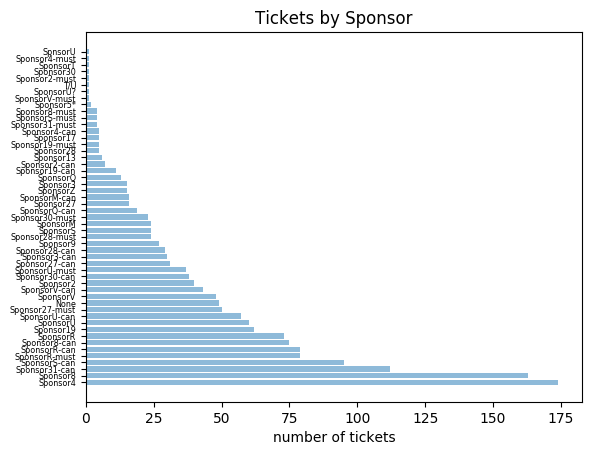

In [48]:
# which sponsors got ticket closed
sponsors_by_tickets = csv_file['Sponsor'].value_counts()

objects = tuple(sponsors_by_tickets.keys())
y_pos = np.arange(len(objects))
tickets = list(sponsors_by_tickets)

plt.barh(y_pos, tickets, align='center', alpha=0.5)
plt.yticks(y_pos, objects, fontsize='xx-small')
plt.xlabel('number of tickets')
plt.title('Tickets by Sponsor')

plt.show()

In [14]:
# who had tickets
csv_file['Owner'].value_counts()

tbb-team                 4136
nickm                    1210
mikeperry                1024
pde                       796
erinn                     724
atagar                    660
metrics-team              621
hellais                   548
phobos                    524
karsten                   442
teor                      439
tpa                       437
hiro                      405
chiiph                    375
dgoulet                   333
isis                      323
asn                       322
n8fr8                     244
qbi                       236
dcf                       233
irl                       231
runa                      222
boklm                     222
zyan                      211
Sebastian                 207
ioerror                   204
tor-gitadm                179
weasel                    165
brade                     165
yawning                   161
                         ... 
hellais, naif               1
attila                      1
Ulincsys  

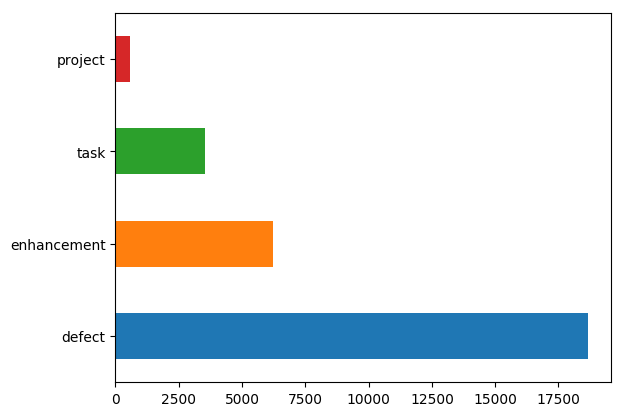

In [7]:
# What type of tickets we got
csv_file['Type'].value_counts().plot.barh()

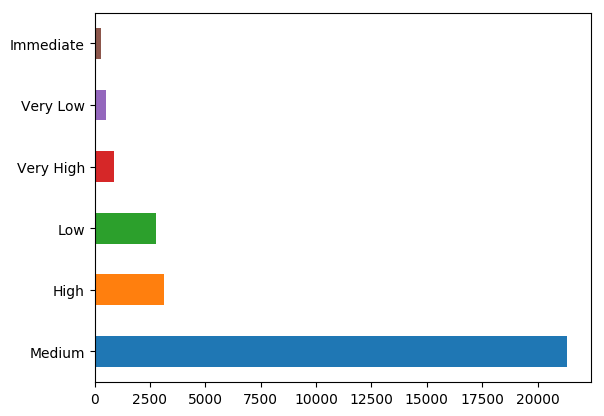

In [12]:
# How many high and very high tickets
csv_file['Priority'].value_counts().plot.barh()

In [16]:
# which milestone the tickets were for
csv_file['Milestone'].value_counts()

Tor: unspecified                    2498
Tor: 0.2.3.x-final                   472
Tor: 0.2.4.x-final                   447
Tor: 0.3.5.x-final                   383
Tor: 0.2.9.x-final                   382
Tor: 0.3.2.x-final                   360
Tor: 0.2.8.x-final                   353
Tor: 0.2.5.x-final                   319
Tor: 0.2.6.x-final                   306
Tor: 0.2.2.x-final                   306
Tor: 0.3.3.x-final                   271
Tor: 0.3.4.x-final                   264
Tor: 0.2.7.x-final                   248
Tor: 0.3.0.x-final                   237
Tor: 0.3.1.x-final                   234
Tor: 0.4.0.x-final                   207
Tor: 0.4.1.x-final                   206
Tor: 0.4.2.x-final                   126
sbws: 1.0.x-final                    114
TorBrowserBundle 2.2.x-stable         96
TorBrowserBundle 2.3.x-stable         90
website redesign                      78
sbws: unspecified                     62
HTTPS-E next Firefox dev release      50
sbws: 1.1.x-fina

In [19]:
# How many 'big' tickets got resolved
csv_file['Points'].value_counts()


0.1     27
1.0     16
0.2     12
0.5      9
0.0      6
3.0      4
0.3      2
15.0     2
2.0      2
10.0     2
Name: Points, dtype: int64

In [17]:
# How tickets got resolved
csv_file['Resolution'].value_counts()

fixed               12473
implemented          2476
wontfix              2212
duplicate            2048
not a bug             964
worksforme            804
invalid               801
Fixed                 627
user disappeared      368
Not a bug             115
Duplicate              84
Implemented            81
Works for me           46
User disappeared       38
None                   31
Won't fix              23
Deferred               22
Won't implement        19
Name: Resolution, dtype: int64

In [19]:
# How many days took to complete the ticket versus estimation
csv_file.filter(items=['Sponsor', 'Points', 'Actual Points']).groupby('Sponsor') #.sum().plot.barh()



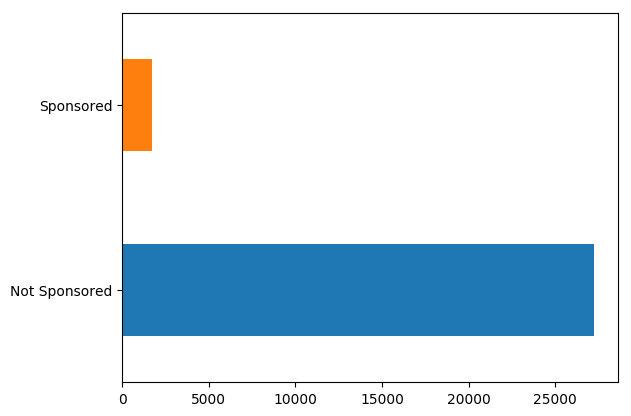

In [21]:
# How much work was not sponsored

sponsor_and_not = csv_file['Sponsor'].notnull().value_counts().rename(lambda x: 'Sponsored' if x else 'Not Sponsored')

sponsor_and_not.plot.barh()


In [24]:
# From all not sponsored work which releases they went into

not_sponsored_work = csv_file[csv_file.Sponsor.isnull()]
not_sponsored_work['Milestone'].value_counts()

Tor: unspecified                    2229
Tor: 0.2.3.x-final                   472
Tor: 0.2.4.x-final                   446
Tor: 0.3.5.x-final                   319
Tor: 0.2.5.x-final                   317
Tor: 0.2.2.x-final                   306
Tor: 0.3.2.x-final                   294
Tor: 0.2.6.x-final                   292
Tor: 0.2.9.x-final                   287
Tor: 0.2.8.x-final                   278
Tor: 0.3.3.x-final                   219
Tor: 0.2.7.x-final                   214
Tor: 0.3.4.x-final                   182
Tor: 0.3.0.x-final                   169
Tor: 0.3.1.x-final                   160
Tor: 0.4.1.x-final                   128
Tor: 0.4.0.x-final                   121
sbws: 1.0.x-final                    114
TorBrowserBundle 2.2.x-stable         96
TorBrowserBundle 2.3.x-stable         90
website redesign                      70
sbws: unspecified                     62
Tor: 0.4.2.x-final                    56
HTTPS-E next Firefox dev release      50
sbws: 1.1.x-fina

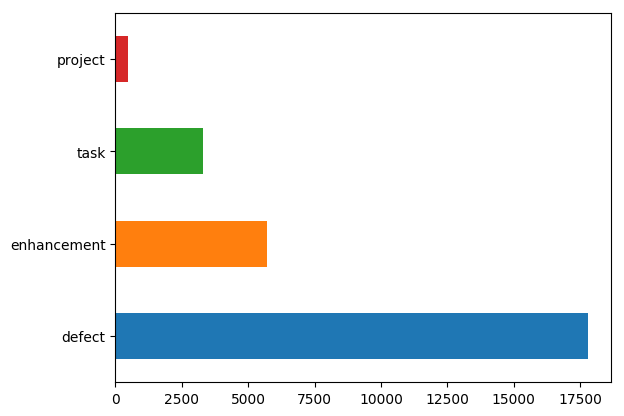

In [25]:
# What is this non sponsored work

not_sponsored_work['Type'].value_counts().plot.barh()

In [26]:
# We understnd bugs and want to track which specific non sponsored enhancement we are prioritizing. 
not_sponsored_work.query('Type=="enhancement"')

# It seems that this are all tickets that were: 
# . closed some time ago but just recently commented.
# . tickets that volunteers worked on
# . updates to scripts (like #30114)


id                                            Summary  \
13      2561                       Context based rule interface   
14      2562                       Context based rule interface   
57      5592                   can't connect to .onion services   
63      5997  ML privacy enhancement: remove incoming mail p...   
75      6541  Make Decentralized SSL Observatory / Tor inter...   
81      6958                    Implement JavaScript HTTP proxy   
89      8294                   take at least a five day weekend   
98      9380   BridgeDB should use Stem for parsing descriptors   
130    12872      Know within which country a bridge is located   
135    13578  Store Pluggable Transport information in database   
170    18071        Add new obfs4 bridge riemann to Tor Browser   
171    18104  Add new default obfs4 bridge noether to Tor Br...   
194    21961  should torbrowser enable network.IDN_show_puny...   
197    22545  .onion sites are being labled with "insecure c...   
262    29116  I need help.. all I know is I accidentally cha...   
277    29810                         Pornhub login doesn't work   
282    30099                           Orbot: v3 onion services   
327      591  What is the control password in the last Alpha...   
334      716       Mixminion Executable (Mixminion.exe) Please!   
347     1110         Popup box asking about language preference   
391     2697  Detect exit nodes running 'transparent' HTTP p...   
400     2843     Check an environment variable for a SOCKS port   
428     3446                               Support Firefox 5.0.   
479     5863             Remove the ability to toggle Torbutton   
497     6521                          air gap the build machine   
511     7045                Get redirectTo API merged into FF17   
536     8228  Tor Launcher: Ensure we always have a Tor on 1...   
547     8472  Check goes down, TBB appears to be failing to ...   
556     8613  Complete the oonib scripts for publishing reports   
567     8927  Please build future TBB versions with optimiza...   
...      ...                                                ...   
28879  19052                      collector jenkins integration   
28882  19562        Implement a voting_schedule_free() function   
28884  19774         bridges.torproject.org could use a favicon   
28886  20010    modifications of relay(s) on fallback whitelist   
28888  20168  Clarify our #if{n}def by commenting what they ...   
28891  20268  Usuability of right-click search for startpage...   
28900  21148  Restore documentation for the approved-routers...   
28901  21159                      Superfluous Include Statement   
28903  21250        Suggestions for translations source strings   
28904  21281           Allow process poll rate to be customized   
28905  21284       Add torrc option for non-anonymous SocksPort   
28912  21994  Consensus Health: what is the distribution of ...   
28914  22240      Selectively re-enable extension auto updates.   
28919  22524                             clear download history   
28921  22828  UX: RSS Feed "Edit as new Message" has still H...   
28924  23207  Registration on trac seems to be counterintuitive   
28925  23282  Add option to permanently block resizes of the...   
28928  23924                           Improve control-spec.txt   
28929  23939  Create an XMPP interface for querying relay/br...   
28930  24134     Make supported version timeline easier to find   
28933  24463  Advanced search: Add a client auto-completion ...   
28939  25188  Spec bug in formal definition of Document in d...   
28950  26420  Testing - specify literal patterns instead of ...   
28951  26492  code style improvements for src/rust/protover/...   
28959  28965                   Please accept -i :9150 parameter   
28960  28999                    Mention dependencies in INSTALL   
28961  29000             Let torsocks run from source directory   
28962  29254                  open multiple urls on comma

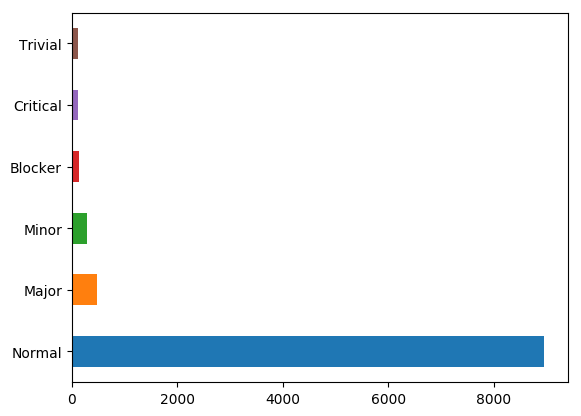

In [28]:
# What are the not sponsored bugs fixed?
not_sponsored_work.query('Type=="defect"')['Severity'].value_counts().plot.barh()

In [29]:
not_sponsored_work.query('Type=="defect"').query('Severity=="Minor"')

id                                            Summary  \
1732    3667                   Toolbar icons non-deterministic?   
3090   17398            Memory leak in batch signature checking   
3161   18254  option to disable a security prompt when it po...   
3251   19424  remove hard coded paths and set default proper...   
4281   30134  reEnable IPv6 routing by Orbot add back Route ...   
10873  10573  `nsILocalFile` should be replaced with `nsIFil...   
14360  16182  Replacing an older pending vote from this dire...   
15159  17347                  Tor doesn't build under musl-libc   
15161  17351  Remove unused code / entities related to "fix_...   
15188  17392            tor manpage should link to torspec repo   
15288  17517  Consider using different color for "Add Except...   
15334  17575            Openstreetmap GUI elements not rendered   
15433  17724                   Unreliable rend_cache_purge test   
15439  17732              Document required build tool versions   
15455  17751  Use router_get_my_routerinfo() rather than des...   
15472  17778                           Memory leak in ntor test   
15508  17828  no traffic graph for 3 days and for one weeks ...   
15666  18074                          TBB Vagrantfile uses HTTP   
15683  18095  Unit test integer precision warnings on 32 bit...   
15802  18263    GETCONF provides incorrect value when undefined   
15813  18277   Tor was unable to provide the descriptor for ...   
15877  18368    Don't call a consensus a "vote" in log messages   
15882  18373              Trunnel can generate memcpy(p,NULL,0)   
15902  18404           "make test-network" failed for test010bc   
15906  18448  transproxy enabled on FreeBSD but not derivatives   
15909  18451               log msg is printed twice after 5 sec   
15952  18510  "AccountingMax 20 TB" doubles the actual netwo...   
15972  18543  Change dialog message when there is no protoco...   
16003  18590  "My reported tickets" doesn't work like "my ti...   
16012  18600  Warning in rend_service_intro_has_opened isn't...   
...      ...                                                ...   
28378  28956                              Github nyx repository   
28390  29164  with dark desktop theme: unreadable guard text...   
28405  29621               Systemd Tor service starts too early   
28409  29674                      silence or uninstall logwatch   
28412  29712  sbws should use 1024 to convert kilobytes to b...   
28413  29741  Work out how to fail chutney travis jobs when ...   
28418  29846         fstrim script makes noises on some servers   
28420  29870      Tor Browser hotkeys stop working unexpectedly   
28435  30416                         Enforce cooperation sanity   
28436  30422  test.integ.control.controller failing for tor 2.x   
28437  30453                         Failing tests on travis ci   
28442  30561  Fixed tor_vasprintf on systems without vasprintf.   
28446  30723  Work out why no measurements are excluded beca...   
28447  30724  Work out why relay_in_recent_consensus_count i...   
28450  30858  Load geoip and geoip6 files during the unit tests   
28451  30920     Detect uint64 overflow in config_parse_units()   
28784  14828  Multiple hidden services can share a pk_digest...   
28841  17602         'HidServDirectoryV2 0' not disabling HSDir   
28845  17671  TorperfResultImpl doesn't set its @type annota...   
28849  17846  32bit decimal IP address fail (i.e. no octets)...   
28861  18182      Windows: Tor Browser Bundle vs Tor NT Service   
28883  19733  GETINFO response parser doesn't handle AF_UNIX...   
28885  19777  tor-gencert should warn nicely when PEM passph...   
28899  20883  Ignore relays without contact info when emaili...   
28920  22534  Stop parsing rend protocol versions greater th...   
28935  24630  Stop initialising rust git submodules, travis ...   
28937  24923               typo in Nyx docs config page heading   
28964  29499  permission error: nyx requires executable p

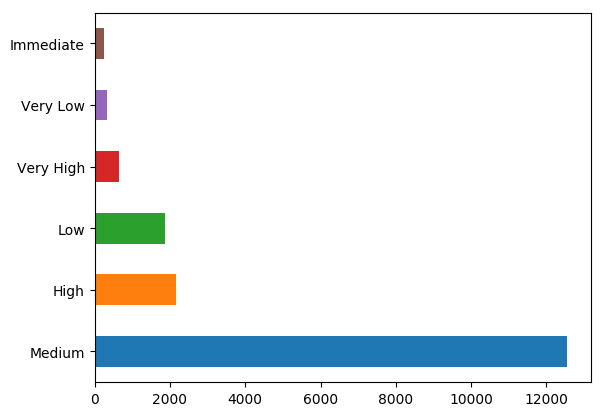

In [30]:
not_sponsored_work.query('Type=="defect"')['Priority'].value_counts().plot.barh()

In [31]:
not_sponsored_work.query('Type=="defect"').query('Priority=="Low"')

id                                            Summary  \
25683      3  changing PublicKeyLifetime to smaller values i...   
25684      4                   Incorrect node routing with mbox   
25685      6         Confused server clocks can screw up timing   
25686      7               client 'flush' takes too much memory   
25687      8          List of servers has names right justified   
25688      9             Client MMTP timeouts don't really work   
25689     12  AttributeError: 'module' object has no attribu...   
25690     13  IOError: [Errno 2] No such file or directory: ...   
25691     14  This server's files are stored in an older format   
25692     16  AttributeError: 'NoneType' object has no attri...   
25693     17                                 minor formatig bug   
25694     18  TypeError: not enough arguments for format string   
25695     19  directory permission error shouldn't be an exc...   
25696     20                                  packaging issues.   
25697     21  generate-surb closes stdout, breaks 'mixminion...   
25698     22                   --quiet doesn't work for clients   
25699     23  Contact Info in directory entry is not compulsory   
25700     24                           Tight loop in async code   
25701     25                                   Log files in UTC   
25702     26                               cannot send 10M file   
25703     27  Exception while cleaning; shutting down thread...   
25704     29  traceback happens occasionally during queue or...   
25705     30                multiple client processes colliding   
25706     31  mixminion reassemble PqEYO0ly9UZb -o foo  give...   
25707     32           reassembled message does not match sent.   
25708     33  please don't create files if you have nothing ...   
25709     34  reassemble throws exception: NameError: global...   
25710     35          reassemble's output is one byte too long.   
25711     36                              Man page typo for  -F   
25712     37          mixminion crashes if name resolution fail   
...      ...                                                ...   
28376  28913  Base32_decode should return the length of its ...   
28377  28944                  Debian logrotate misses line "su"   
28378  28956                              Github nyx repository   
28383  29037                      Why am I still being tracked?   
28384  29055  Add synonym OnionService* to HiddenService* to...   
28387  29110  Allow passing seed value to slow/prop_distr/* ...   
28390  29164  with dark desktop theme: unreadable guard text...   
28403  29573    Tests fail without network interface configured   
28405  29621               Systemd Tor service starts too early   
28406  29636  Document how we estimate users by transport by...   
28409  29674                      silence or uninstall logwatch   
28412  29712  sbws should use 1024 to convert kilobytes to b...   
28413  29741  Work out how to fail chutney travis jobs when ...   
28417  29841                  ipsec VPN generates gigantic logs   
28418  29846         fstrim script makes noises on some servers   
28420  29870      Tor Browser hotkeys stop working unexpectedly   
28421  29908  on 'Documentation' page of torproject.org, lin...   
28428  30097                  Circuit UI not shown in FTP pages   
28435  30416                         Enforce cooperation sanity   
28436  30422  test.integ.control.controller failing for tor 2.x   
28437  30453                         Failing tests on travis ci   
28439  30511                               Remove OnIceComplete   
28440  30526          Tests should not load system geoip files.   
28442  30561  Fixed tor_vasprintf on systems without vasprintf.   
28445  30706               Do some simple BridgeDB housekeeping   
28446  30723  Work out why no measurements are excluded beca...   
28447  30724  Work out why relay_in_recent_consensus_count i...   
28448  30732    "Your Firefox is critically out of date" 

In [32]:
not_sponsored_work.query('Type=="defect"').query('Severity=="Normal"')

id                                            Summary    Status  \
0       1968  window.name is persistent across torbutton toggle    closed   
1       1999  1.3.x: tor:// URL support may allow attacks on...    closed   
2       2011  Torbutton alpha Preferences dialog OK button d...    closed   
3       2025               1.3.x: Non-tor cookies not protected    closed   
4       2028      Reproduce gmail PDF issue w/ debug log output    closed   
5       2148  1.3.x: RefSpoofer fails on 5 test cases out of...    closed   
6       2193           Facebook <securecookie> rules break apps    closed   
7       2204  Recent openssls (1.0.0b and 0.9.8p) break rela...    closed   
9       2312            TBB for Linux tarball contains symlinks    closed   
10      2359       Error prevents display of gitweb.tpo/tor.git    closed   
11      2421  Torbutton Exception in sandbox evaluation., Da...    closed   
12      2428  nytimes.com login page loads after Torbutton t...    closed   
16      2633  "Torbutton Exception in sandbox evaluation. Da...    closed   
17      2780  Investigate Torbutton translation input valida...    closed   
18      2828  FF4 tor browser bundle for linux missing exten...    closed   
19      2868  Fix weird torperf results due to bad guard cho...    closed   
20      3005  TorButton breaks posting text (subject and bod...    closed   
22      3433  pages do not load correctly when tor button is...    closed   
23      3554  TBB should not disable addon updates until Tha...    closed   
24      3597  betterprivacy included in TBB deletes all Flas...    closed   
26      3691            Cookies mismatch issues on google sites    closed   
27      3738                   weird behavior in Vidalia 0.2.13    closed   
28      3790          Debian package for torouter-tui is broken    closed   
29      3801  Library filenames in TBB for Linux 1.1.13 do n...    closed   
33      3906             TBB for Linux ships exploitable libpng    closed   
34      4093  TBB for OSX logs everything to /var/log/system...    closed   
35      4192  make Tor Browser fail to connect when not laun...    closed   
36      4263                TBB on Mac OS X 10.5.8 fails to run    closed   
37      4384           Trac is fascist about child ticket types    closed   
38      4450                           New Tor image won't boot    closed   
...      ...                                                ...       ...   
28741  12685          Wrap fingerprint line on smaller displays    closed   
28744  12799  fingerprints - descriptor Space removal, case ...       new   
28749  12970      dir-spec's a-line shouldn't mention portlists    closed   
28752  13273  Clarify verifying-signatures.html for builds n...    closed   
28756  13456     Tor Launcher should start centered on all OSes       new   
28757  13459  About Tor Button Window Too Short on OS X Mave...    closed   
28773  14066  SIGHUP: Reloading config and does not reset in...       new   
28778  14211    --data-dir argument is not properly recognized.       new   
28792  15333                Minor control-spec.txt corrections.    closed   
28794  15380               log messages are doubled and unclear       new   
28795  15381  cosmetic issue in log message : v0.1.2.3 versu...    closed   
28803  15661  Same "non-loopback address" notice is printed ...       new   
28812  16119                        Can't access crunchbang.org    closed   
28815  16418                       Typo "continium" in ooni-api    closed   
28820  16598  fsync ed25519 master key files before closing ...  assigned   
28823  16759   Typo in a Tor Messenger string (xmpp.properties)    closed   
28835  17438  if HSDir is set then report a (blurred) uptime...    closed   
28839  17515                               Update README.1st.md    closed   
28852  17941                        link corruptive chroot-jail    closed   
28854  17954                              typo french about:tor    closed   
28855 